### quantifying relative luminance for frame level analysis

In [52]:
import cv2
import numpy as np
from statistics import mean

def relativeLuminance(img):
    img = cv2.resize(img, (64,64))
    B, G, R = cv2.split(img)
#     print(B.shape)
    c = 0
    tmp_list = []
    for b,g,r in zip(B,G,R):
        RL = 0
        RL = mean([(p*0.2125) for p in r])/255 + mean([(p*0.715) for p in g])/255 + mean([(p*0.072) for p in b])/255
#         RL = (mean(r)*0.2125 + mean(g)*0.715 + mean(b)*0.072) / 255 
        tmp_list.append(RL)
    return mean(tmp_list)

### finding RL for all train frames in good & bad

In [53]:
import os

bad_folder = r"D:\data\final_data\output\train\badlight"
good_folder = r"D:\data\final_data\output\train\good"

g_rl = []
b_rl = []

bad_files = os.listdir(bad_folder)
good_files = os.listdir(good_folder)

for f in good_files:
    path = os.path.join(good_folder, f)
    img = cv2.imread(path)
    g_rl.append(relativeLuminance(img))
    
print(g_rl)

[0.3597128307866115, 0.35387531546798406, 0.38995802408854163, 0.4224182933134191, 0.45089498889399504, 0.5418637657015931, 0.3912080015893076, 0.38633457509957103, 0.3420489808325674, 0.36130017472809434, 0.42291922966452206, 0.554389577588848, 0.5427212933708639, 0.5338905828737744, 0.3482094109030331, 0.4226384167241115, 0.36828804764093137, 0.35305167786841296, 0.3614600743910846, 0.38753028253293503, 0.3655115440219056, 0.42251960880055145, 0.5171518492455576, 0.540659020278033, 0.3614074213962929, 0.5321684225643382, 0.42323291925168505, 0.36108183258655024, 0.4226589475145527, 0.3766662707758885, 0.33176722340303305, 0.5344705063763786, 0.4228699592141544, 0.4652294500612745, 0.36132637101715687, 0.36209911870021444, 0.5444792442172182, 0.36247394684436274, 0.42300635100719974, 0.3378960152420343, 0.367936328125, 0.33725646015242033, 0.5428754978553921, 0.3615401496438419, 0.36485512408088233, 0.3807665120442708, 0.5525781752642464, 0.35173140988817403, 0.39170126282935047, 0.54

In [54]:
for f in bad_files:
    path = os.path.join(bad_folder, f)
    img = cv2.imread(path)
    b_rl.append(relativeLuminance(img))
    
print(b_rl)

[0.3906110356349571, 0.32945781010646447, 0.032766343060661764, 0.4195951258042279, 0.16857371036305147, 0.019123060757506128, 0.1584520876416973, 0.032169536037071074, 0.05621184847962622, 0.1849813849954044, 0.05966081686580882, 0.032331552542892154, 0.031477090513939945, 0.3300401295381434, 0.38330160414751835, 0.18462674249387254, 0.03209114200367647, 0.3298733096852022, 0.019647865923713235, 0.03137831504672181, 0.05935992503446691, 0.1721340399050245, 0.03026407159543505, 0.020725067018995097, 0.17048431659773283, 0.336338458850337, 0.18395001101026348, 0.031510401826746325, 0.031226925359987744, 0.05935628877527573, 0.4194562638825061, 0.060643325386795344, 0.0600041446461397, 0.33549414110370707, 0.18592969085094976, 0.3316152525658701, 0.06064508559283088, 0.4207902879901961, 0.05595162568933823, 0.419674360926011, 0.17176709223728553, 0.1846487496170343, 0.1639830757889093, 0.059838369332107844, 0.18433665460324755, 0.33003456744025733, 0.030922482479319852, 0.419749956437653

### statistical analysis of RL

In [4]:
from statistics import mean, mode

print('for good frames:')
print('mean RL of good frames: ', mean(g_rl))
print('mode RL of good frames: ', mode(g_rl))
print('min RL of good frames: ', min(g_rl))
print('max RL of good frames: ', max(g_rl))
print('\nfor bad frames:')
print('mean RL of bad frames: ', mean(b_rl))
print('mode RL of bad frames: ', mode(b_rl))
print('min RL of bad frames: ', min(b_rl))
print('max RL of bad frames: ', max(b_rl))

for good frames:
mean RL of good frames:  0.41824536858011774
mode RL of good frames:  0.3597128307866115
min RL of good frames:  0.3096990114698223
max RL of good frames:  0.5900736519607843

for bad frames:
mean RL of bad frames:  0.17887265092172394
mode RL of bad frames:  0.3906110356349571
min RL of bad frames:  0.01819514830346201
max RL of bad frames:  0.42099789225260414


### visualization of good and bad frames

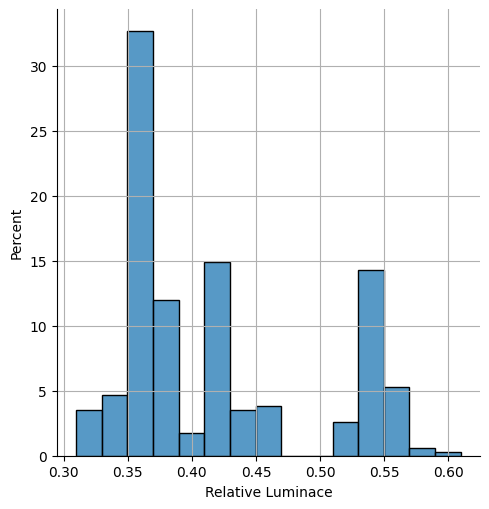

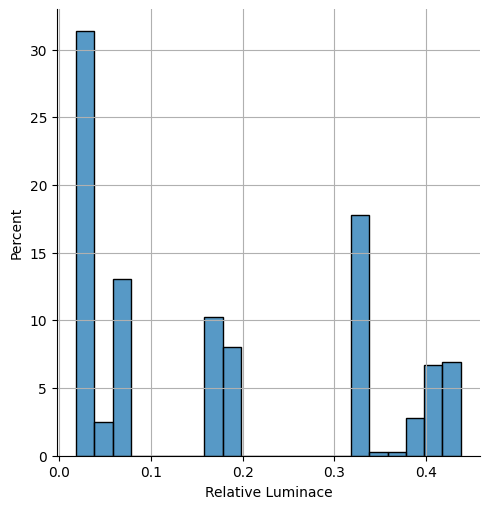

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(g_rl, fill=True, binwidth=.02, stat='percent')
plt.xlabel('Relative Luminace')
plt.grid()

sns.displot(b_rl, fill=True, binwidth=.02, stat='percent')
plt.xlabel('Relative Luminace')
plt.grid()

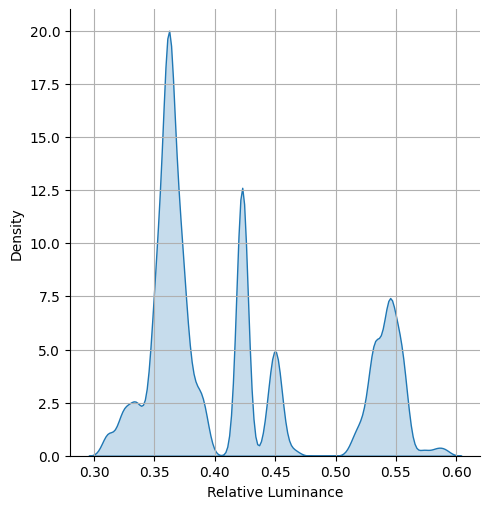

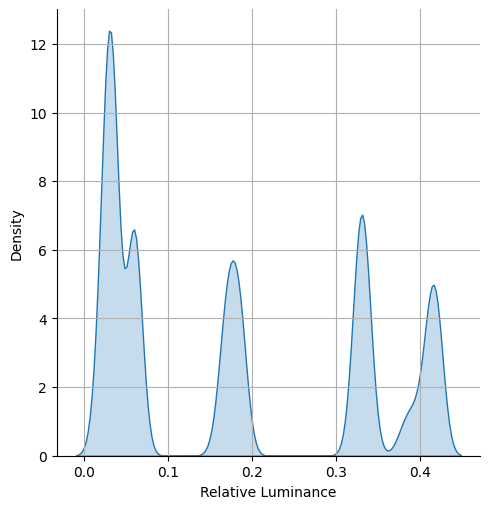

In [7]:
ax = sns.displot(g_rl, kind='kde', fill=True, bw_adjust=.2)

# plt.plot(x[idx], kde2_x[idx], 'ko')
plt.xlabel('Relative Luminance')
# plt.vlines(x = 0.3435, ymin = 0, ymax = 10, color='red')
# plt.plot(0.3458045837538505,1.816255885248765, 'o')
plt.grid()


ax = sns.displot(b_rl, kind='kde', fill=True, bw_adjust=.2)

# plt.plot(x[idx], kde2_x[idx], 'ko')
plt.xlabel('Relative Luminance')
# plt.vlines(x = 0.3435, ymin = 0, ymax = 20, color='red')
# plt.plot(0.3458045837538505,1.816255885248765, 'o')
plt.grid()

### Threshold optimization

In [59]:
import pandas as pd

good_data = {
    'Label' : ['good' for i in range(0, len(g_rl))],
    'RL' : g_rl
}
bad_data = {
    'Label' : ['dark' for i in range(0, len(b_rl))],
    'RL' : b_rl
}

# creating a dataframe
df1 = pd.DataFrame(good_data)
df2 = pd.DataFrame(bad_data)
df = pd.concat([df1, df2], axis=0)
print(df)

    Label        RL
0    good  0.359713
1    good  0.353875
2    good  0.389958
3    good  0.422418
4    good  0.450895
..    ...       ...
355  dark  0.032022
356  dark  0.166977
357  dark  0.031938
358  dark  0.185565
359  dark  0.171299

[702 rows x 2 columns]


In [66]:
# sns.displot(df, x="RL", binwidth=0.08)
# sns.displot(df, x="RL", bins=10)

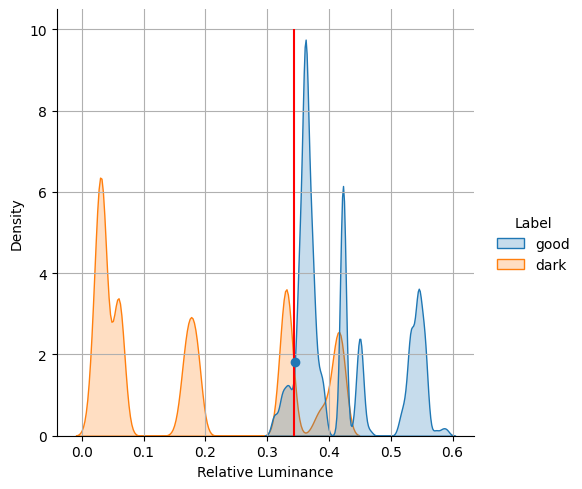

In [60]:
from scipy.stats import gaussian_kde
from shapely.geometry import LineString

ax = sns.displot(df, x="RL", hue="Label", kind='kde', fill=True, bw_adjust=.2)

# plt.plot(x[idx], kde2_x[idx], 'ko')
plt.xlabel('Relative Luminance')
plt.vlines(x = 0.3435, ymin = 0, ymax = 10, color='red')
plt.plot(0.3458045837538505,1.816255885248765, 'o')
plt.grid()

### finding intersection between these 2 curves

[0.01819515 0.02021928 0.02224342 0.02426755 0.02629169 0.02831582
 0.03033995 0.03236409 0.03438822 0.03641236 0.03843649 0.04046063
 0.04248476 0.0445089  0.04653303 0.04855716 0.0505813  0.05260543
 0.05462957 0.0566537  0.05867784 0.06070197 0.0627261  0.06475024
 0.06677437 0.06879851 0.07082264 0.07284678 0.07487091 0.07689505
 0.07891918 0.08094331 0.08296745 0.08499158 0.08701572 0.08903985
 0.09106399 0.09308812 0.09511226 0.09713639 0.09916052 0.10118466
 0.10320879 0.10523293 0.10725706 0.1092812  0.11130533 0.11332946
 0.1153536  0.11737773 0.11940187 0.121426   0.12345014 0.12547427
 0.12749841 0.12952254 0.13154667 0.13357081 0.13559494 0.13761908
 0.13964321 0.14166735 0.14369148 0.14571561 0.14773975 0.14976388
 0.15178802 0.15381215 0.15583629 0.15786042 0.15988456 0.16190869
 0.16393282 0.16595696 0.16798109 0.17000523 0.17202936 0.1740535
 0.17607763 0.17810177 0.1801259  0.18215003 0.18417417 0.1861983
 0.18822244 0.19024657 0.19227071 0.19429484 0.19631897 0.198343

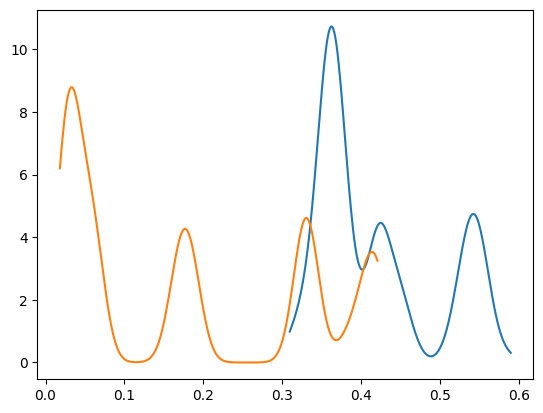

In [57]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from shapely import Point, LineString

data = g_rl
density = stats.gaussian_kde(data, bw_method=0.2)
x = np.linspace(min(data), max(data), 200)
pdf = density(x)

# print(x, pdf)
first_line = LineString(np.column_stack((x, pdf)))


plt.plot(x, pdf)
# plt.show()
# print('-------------------------')

data = b_rl
density = stats.gaussian_kde(data, bw_method=0.1)
x = np.linspace(min(data), max(data), 200)
pdf = density(x)

print(x,pdf)
second_line = LineString(np.column_stack((x, pdf)))

plt.plot(x, pdf)

intersection = first_line.intersection(second_line)
print(intersection)

# if intersection.geom_type == 'MultiPoint':
#     plt.plot(*LineString(intersection).xy, 'o')
# elif intersection.geom_type == 'Point':
#     plt.plot(*intersection.xy, 'o')
    
plt.show()

### Extracting RL from test data

In [141]:
good_files_p = r"D:\data\final_data\output\val\good"
bad_files_p = r"D:\data\final_data\output\val\badlight"

good_frames = os.listdir(good_files_p)
bad_frames = os.listdir(bad_files_p)

test_g_rl = []
test_b_rl = []

for f in good_frames:
    path = os.path.join(good_files_p, f)
    img = cv2.imread(path)
    test_g_rl.append(relativeLuminance(img))
    
print(test_g_rl)

[0.385113099341299, 0.3731361261106005, 0.5304543662875306, 0.5115106641582414, 0.5556592280369178, 0.522566934742647, 0.42286644550398284, 0.34998379863664214, 0.5513836430568321, 0.37069242924708945, 0.4224510574640012, 0.42236099111519604, 0.5386105119293811, 0.37345467984068625, 0.3728623061236213, 0.5505672411151961, 0.42284662176393994, 0.3584386484183517, 0.5493296362783394, 0.36163939520143995, 0.3618257080078125, 0.3701482498468137, 0.5548928323184742, 0.3619020397709865, 0.3601855195886948, 0.42222444613587623, 0.4227314338235294, 0.36194364516314337, 0.35068303462009803, 0.4476792542700674, 0.4224458931717218, 0.5440846172257966, 0.5479050532322304, 0.3618888992608762, 0.42276680644914216, 0.39188268181295954, 0.5276321571499694, 0.5440166695389093, 0.36143027583103554, 0.3618338575176164, 0.3610395282820159, 0.422932040345435, 0.5338748262293198, 0.3749858029833027, 0.4232207246668198, 0.37404840303308823, 0.362078737745098, 0.4226934886259191, 0.3728484092562806, 0.3617776

In [142]:
for f in bad_frames:
    path = os.path.join(bad_files_p, f)
    img = cv2.imread(path)
    test_b_rl.append(relativeLuminance(img))
    
print(test_b_rl)

[0.33807793208103554, 0.030682440065870096, 0.029138433000153185, 0.057543221986060045, 0.1851825520833333, 0.05984161496629902, 0.02029808421415441, 0.41837212297028187, 0.32814576056985295, 0.05946852309283088, 0.03204745710784314, 0.06085995854396446, 0.41956973661534924, 0.3298610495174632, 0.030529770316329655, 0.41871131472120093, 0.031930393592984066, 0.32683011163449754, 0.32971024481081496, 0.4147900826248468, 0.184548517444087, 0.020250700348498775, 0.39603810843673404, 0.059947441310508574, 0.32995012972962623, 0.03073339317172181, 0.16997383626302082, 0.059957464479932596, 0.029710963828890928, 0.031802183383118875, 0.017397311102175246, 0.060544274184283084, 0.030838490445006125, 0.019020104741115196, 0.4173457462086397, 0.41796639763327204, 0.0322869691138174, 0.4150942818435968, 0.3256784074371936, 0.028977826286764704, 0.03176639380361519, 0.022626610370710783, 0.05988058555453431, 0.18415864545036764, 0.031537580422794115, 0.17025365875842524, 0.01914809378829657, 0.03

### validating the resultant threshold on test data

In [244]:
threshold = 0.346

TP = 0
TN = 0
FP = 0
FN = 0

for rl1,rl2 in zip(test_g_rl, test_b_rl):
    if rl1 >= threshold:
        TP +=1
    else:
        FN +=1

    if rl2 >= threshold:
        FP += 1
    else:
        TN += 1

        
print(TP, TN, FP, FN)
print((TP+TN)/(TP+TN+FP+FN))

print(f'In test data: for choosen threshold=0.326, TP={TP}, TN={TN}, FP={FP}, FN={FN}')

217 190 38 11
0.8925438596491229
In test data: for choosen threshold=0.326, TP=217, TN=190, FP=38, FN=11


## Metrics on test data

### confusion matrix

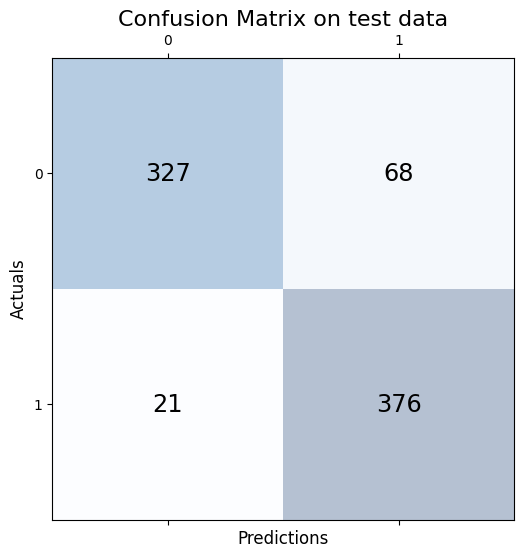

In [34]:
TP = 376
TN = 327
FP = 68
FN = 21

conf_matrix = np.matrix([[TN, FP], [FN, TP]])
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix on test data', fontsize=16)
plt.show()

### Accuracy, Recall, Precision

In [35]:
total=TP+TN+FP+FN
# print(total)
#####from confusion matrix calculate accuracy
accuracy=(conf_matrix[0,0]+conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)

recall = TP/(TP+FN)
print('Recall : ', recall)

precision = TP/(TP+FP)
print('Precision : ', precision)

Accuracy :  0.8876262626262627
Recall :  0.947103274559194
Precision :  0.8468468468468469


In [11]:
import cv2
import numpy as np
from statistics import mean

def relativeLuminance(img):
    B, G, R = cv2.split(img)
#     print(B.shape)
    c = 0
    tmp_list = []
    for b,g,r in zip(B,G,R):
        RL = 0
        RL = mean([(p*0.2125) for p in r])/255 + mean([(p*0.715) for p in g])/255 + mean([(p*0.072) for p in b])/255
#         RL = (mean(r)*0.2125 + mean(g)*0.715 + mean(b)*0.072) / 255 
        tmp_list.append(RL)
    return mean(tmp_list)

In [ ]:
def video2frames(video):
    cap = cv2.VideoCapture(video)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    return frames

In [51]:
import time

vid_path = r"D:\data\final_data\badlight\Parking2_D3_1.mp4"

cap = cv2.VideoCapture(vid_path)

ret, frame = cap.read()
frame = cv2.resize(frame, (1080, 720))


st = time.time()
rl = relativeLuminance(frame)
et = time.time()

if rl < 0.346:
    print("dark")
else:
    print("bright")
    

elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

dark
Execution time: 13.206160068511963 seconds
